In [1]:
# Import the required Python Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Set the Working Directory
os.chdir('C:/Users/Puneet Kishore/OneDrive/Desktop/Imarticus/Python/Project - Linear Regression')

In [3]:
# Import the Data/File from the PC
df_train = pd.read_csv('Property_Price_Train.csv')
df_test  = pd.read_csv('Property_Price_Test.csv')

In [4]:
df_train

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RLD,66.0,9042,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Check the number of rows and columns of Train dataset
df_train.shape

(1459, 81)

In [6]:
df_test

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RMD,21.0,14584.838440,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,NoRMDal
1455,2916,160,RMD,21.0,8072.991379,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,AbnoRMDl
1456,2917,20,RLD,160.0,7367.775348,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RLD,62.0,2203.135444,Paved,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
# Check the number of rows and columns of Test dataset
df_test.shape

(1459, 80)

In [8]:
# Checking the Datatypes of Train Dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [9]:
# Checking the Str/Character of Numeric columns in the Train dataset
df_train.describe()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,...,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,...,93.015667,47.811902,24.580227,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,...,124.796682,67.467586,61.353507,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,-338.112031,-187.149958,-164.807386,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,...,9.656026,1.843186,-16.807302,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,...,92.803628,46.837919,25.026953,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,...,180.335986,96.523486,66.237591,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,572.298709,255.362547,225.762714,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Drop 'Id' columns from both Train and Test datasets
df_train.drop(['Id'], axis = 1, inplace = True)
id_test_list = df_test["Id"].tolist()
df_test.drop(['Id'], axis = 1, inplace = True)

In [11]:
# Check the number of rows and columns of Train dataset after removing 'Id' column
df_train.shape

(1459, 80)

In [12]:
# Check the number of rows and columns of Test dataset after removing 'Id' column
df_test.shape

(1459, 79)

In [13]:
# Segregating the Dataset into Numeric and Categorical columns
numeric_cols = []
categorical_cols = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numeric_cols.append(df_train[col].name)
    else:
        categorical_cols.append(df_train[col].name)

In [14]:
# Save Numeric and Categorigal data in independent dataframes for Train and Test datasets
df_train_numeric = df_train[numeric_cols]
df_train_categorical = df_train[categorical_cols]

df_test_numeric = df_test[numeric_cols[0:-1]]
df_test_categorical = df_test[categorical_cols]

In [15]:
# Numeric Columns
df_train_numeric.columns

Index(['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [16]:
# Check the number of rows and columns of Numeric Train dataset
df_train_numeric.shape

(1459, 37)

In [17]:
# Categorical Columns
df_train_categorical.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [18]:
# Check the number of rows and columns of Categorical Train dataset
df_train_categorical.shape

(1459, 43)

In [19]:
# Check the number of rows and columns of Numeric Test dataset
df_test_numeric.columns

Index(['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold'],
      dtype='object')

In [20]:
# Check the number of rows and columns in Numeric Test dataset
df_test_numeric.shape

(1459, 36)

In [21]:
# Check the number of rows and columns of Categorical Test dataset
df_test_categorical.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [22]:
# Check the number of rowss and columns in Categorical Test dataset
df_test_categorical.shape

(1459, 43)

array([[<AxesSubplot:title={'center':'Building_Class'}>,
        <AxesSubplot:title={'center':'Lot_Extent'}>,
        <AxesSubplot:title={'center':'Lot_Size'}>,
        <AxesSubplot:title={'center':'Overall_Material'}>,
        <AxesSubplot:title={'center':'House_Condition'}>,
        <AxesSubplot:title={'center':'Construction_Year'}>],
       [<AxesSubplot:title={'center':'Remodel_Year'}>,
        <AxesSubplot:title={'center':'Brick_Veneer_Area'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'Total_Basement_Area'}>],
       [<AxesSubplot:title={'center':'First_Floor_Area'}>,
        <AxesSubplot:title={'center':'Second_Floor_Area'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'Grade_Living_Area'}>,
        <AxesSubplot:title={'center':'Underground_Full_Bathroom'}>,
        <AxesSubplot:ti

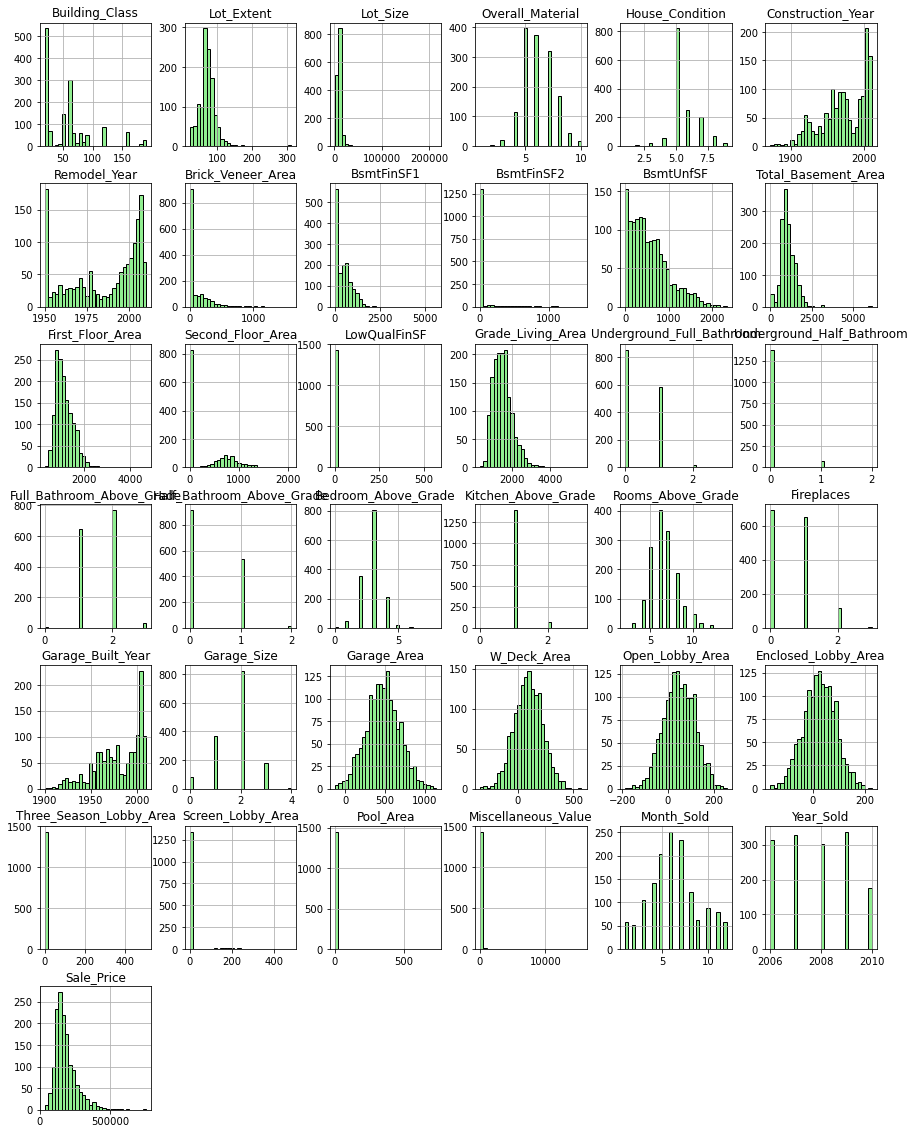

In [23]:
# Visualizing the Numeric Data in the Train Dataset through Histrogram
df_train_numeric.hist(figsize = (15,20), bins = 30, color = 'lightgreen', edgecolor = 'black')

In [24]:
# Import Variance Threshold to drop column with Low Variance
from sklearn.feature_selection import VarianceThreshold
vth = VarianceThreshold(threshold = 0.15)
df_high_variance = vth.fit(df_train_numeric)

In [25]:
# Drop the columns where 85% of the values are constant
high_variance_list = []
for col in df_train_numeric.columns:
    if col not in df_train_numeric.columns[vth.get_support()]:
        high_variance_list.append(col)

high_variance_list

['Underground_Half_Bathroom', 'Kitchen_Above_Grade']

In [26]:
# Drop the 'high_variance_list' columns from both Train and Test datasets
df_train.drop(high_variance_list, axis = 1, inplace = True)
df_test.drop(high_variance_list, axis = 1, inplace = True)

<AxesSubplot:>

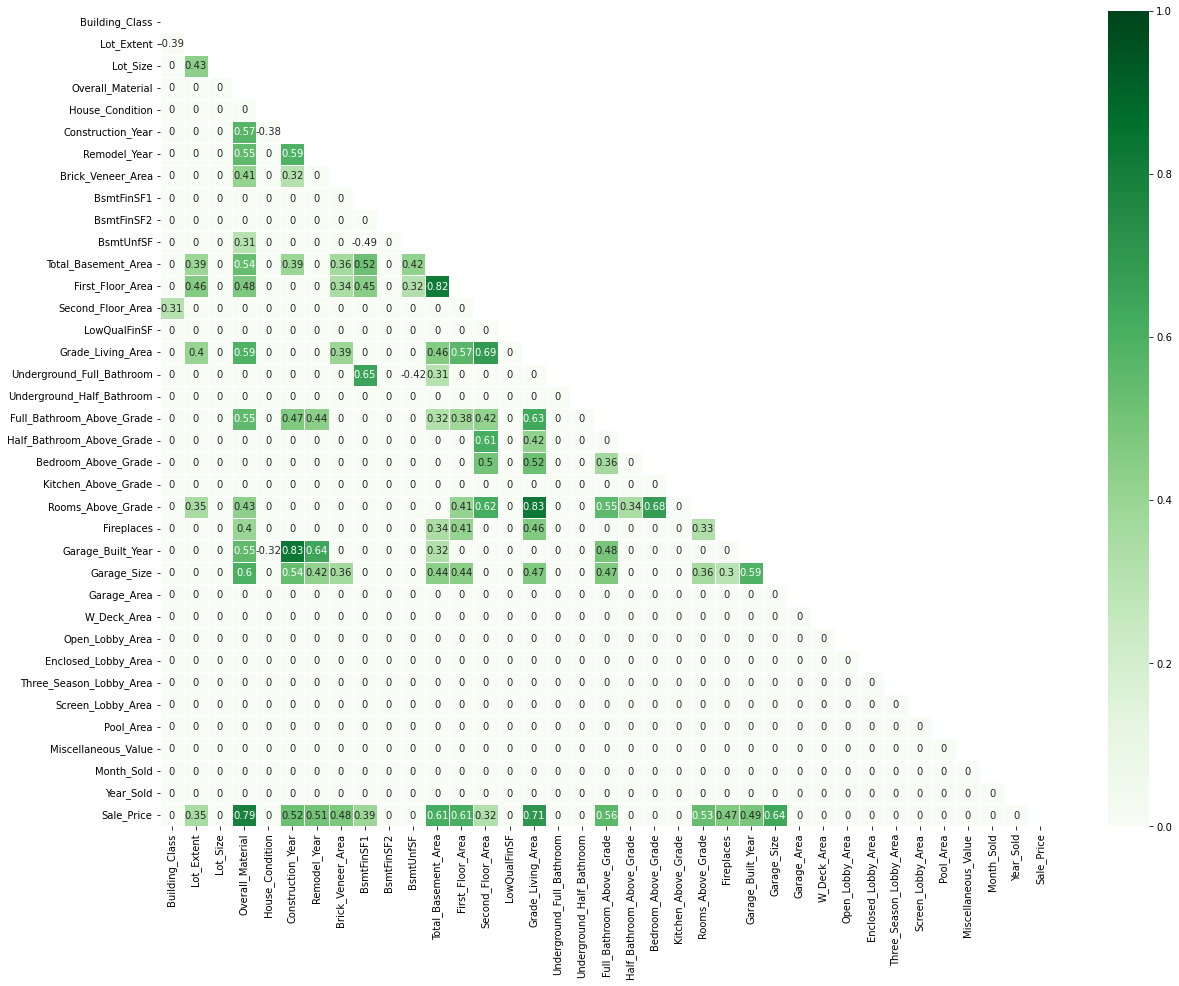

In [27]:
# Plot the Correlation Heatmap
plt.figure(figsize = (20,15))

corr_matrix = df_train_numeric.corr()
mask =  np.triu(np.ones_like(corr_matrix, dtype = bool))
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
sns.heatmap(corr_matrix, annot = True, mask = mask, linewidths = 0.5,cmap='Greens', vmin=0, vmax=1)

In [28]:
# Variables that have a Less Correlation with 'SalePrice' variable [less than 0.25 or -0.25]
condition1  = df_train_numeric.corr()['Sale_Price'] < 0.25
condition2 = df_train_numeric.corr()['Sale_Price'] > -0.25
less_corr_columns = (df_train_numeric.corr()[condition1 & condition2]['Sale_Price'].index).to_list()
less_corr_columns

['Building_Class',
 'House_Condition',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Three_Season_Lobby_Area',
 'Screen_Lobby_Area',
 'Pool_Area',
 'Miscellaneous_Value',
 'Month_Sold',
 'Year_Sold']

In [29]:
# Variables that have a High Correlation with 'SalePrice'
high_corr_columns = [elem for elem in (df_train_numeric.columns).to_list() if elem not in less_corr_columns]
high_corr_columns

['Lot_Extent',
 'Lot_Size',
 'Overall_Material',
 'Construction_Year',
 'Remodel_Year',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Rooms_Above_Grade',
 'Fireplaces',
 'Garage_Built_Year',
 'Garage_Size',
 'Sale_Price']

In [30]:
# Drop the variables that have a Less Correlation with 'SalePrice'
for i in range(len(less_corr_columns)):
    if i in df_train.columns:
        df_train.drop(less_corr_columns, axis = 1)
        df_test.drop(less_corr_columns, axis = 1)

In [31]:
# Insert 'SalePrice' column to the Categorical datatype
categorical_cols.append('Sale_Price')
df_train_categorical = df_train[categorical_cols]
df_train_categorical.columns

Index(['Zoning_Class', 'Road_Type', 'Lane_Type', 'Property_Shape',
       'Land_Outline', 'Utility_Type', 'Lot_Configuration', 'Property_Slope',
       'Neighborhood', 'Condition1', 'Condition2', 'House_Type',
       'House_Design', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate',
       'Fireplace_Quality', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature', 'Sale_Type', 'Sale_Condition', 'Sale_Price'],
      dtype='object')

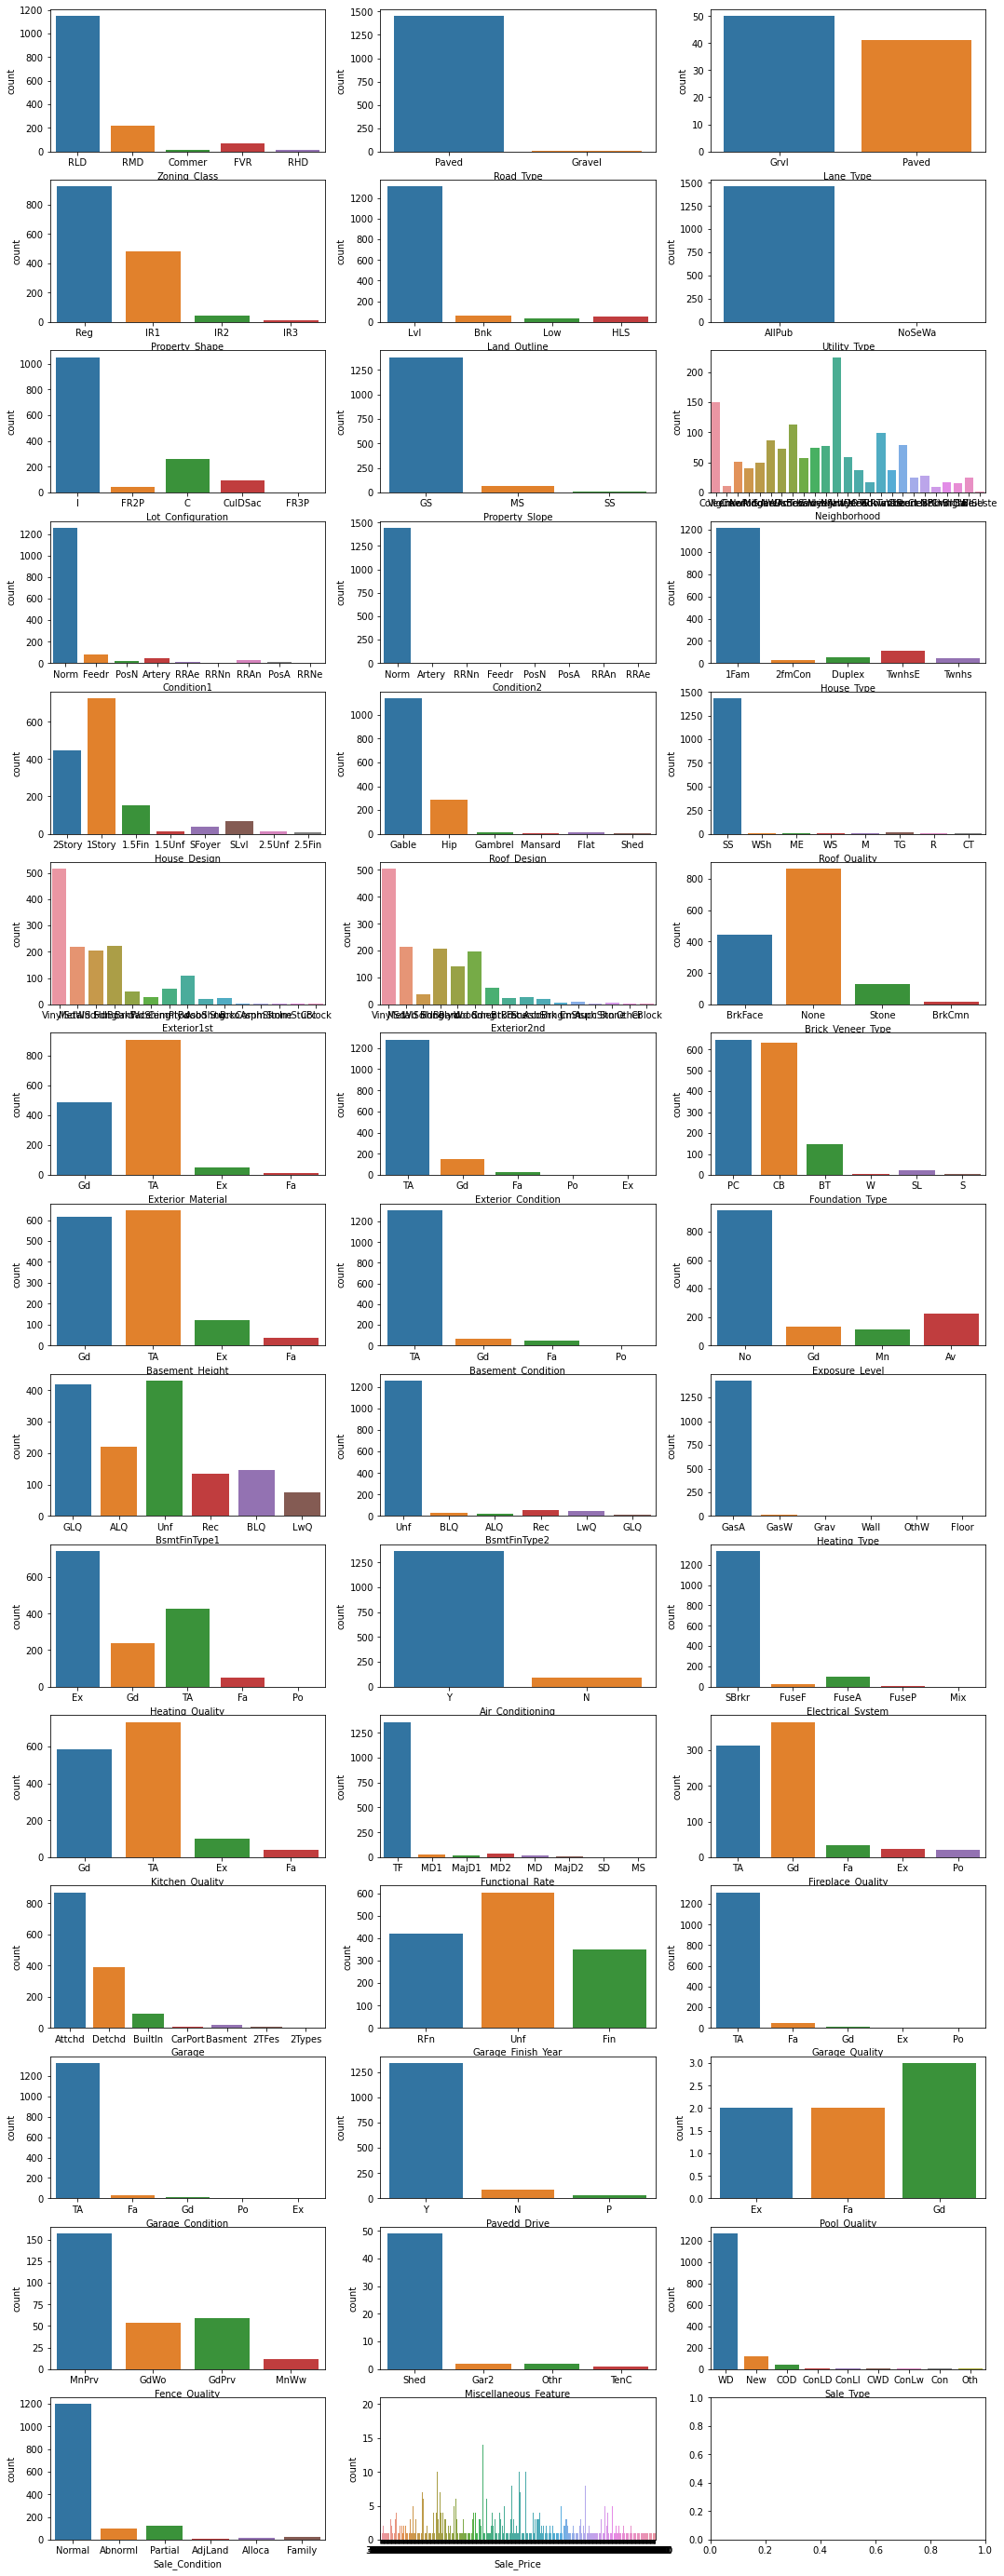

In [32]:
fig, axes = plt.subplots(15, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_train_categorical.columns:
    if j == 3:
        i += 1
        j = 0
        sns.countplot(x = df_train_categorical[col], data = df_train_categorical, ax = axes[i,j])
    else:
        sns.countplot(x = df_train_categorical[col], data = df_train_categorical, ax=axes[i,j])
    j += 1

In [33]:
# Variables that are highly dominated by one feature (more than 90%)

high_dominated_features = []
for col in df_train_categorical.columns:
    if (df_train_categorical[col].value_counts().max()/df_train_categorical[col].count()) > 0.9:
        high_dominated_features.append(col)
        
high_dominated_features

['Road_Type',
 'Utility_Type',
 'Property_Slope',
 'Condition2',
 'Roof_Quality',
 'Basement_Condition',
 'Heating_Type',
 'Air_Conditioning',
 'Electrical_System',
 'Functional_Rate',
 'Garage_Quality',
 'Garage_Condition',
 'Pavedd_Drive',
 'Miscellaneous_Feature']

In [34]:
# Drop the 'high_dominated_features' columns from both Train and Test datasets
df_train.drop(high_dominated_features, axis = 1, inplace = True)
df_test.drop(high_dominated_features, axis  = 1, inplace = True)

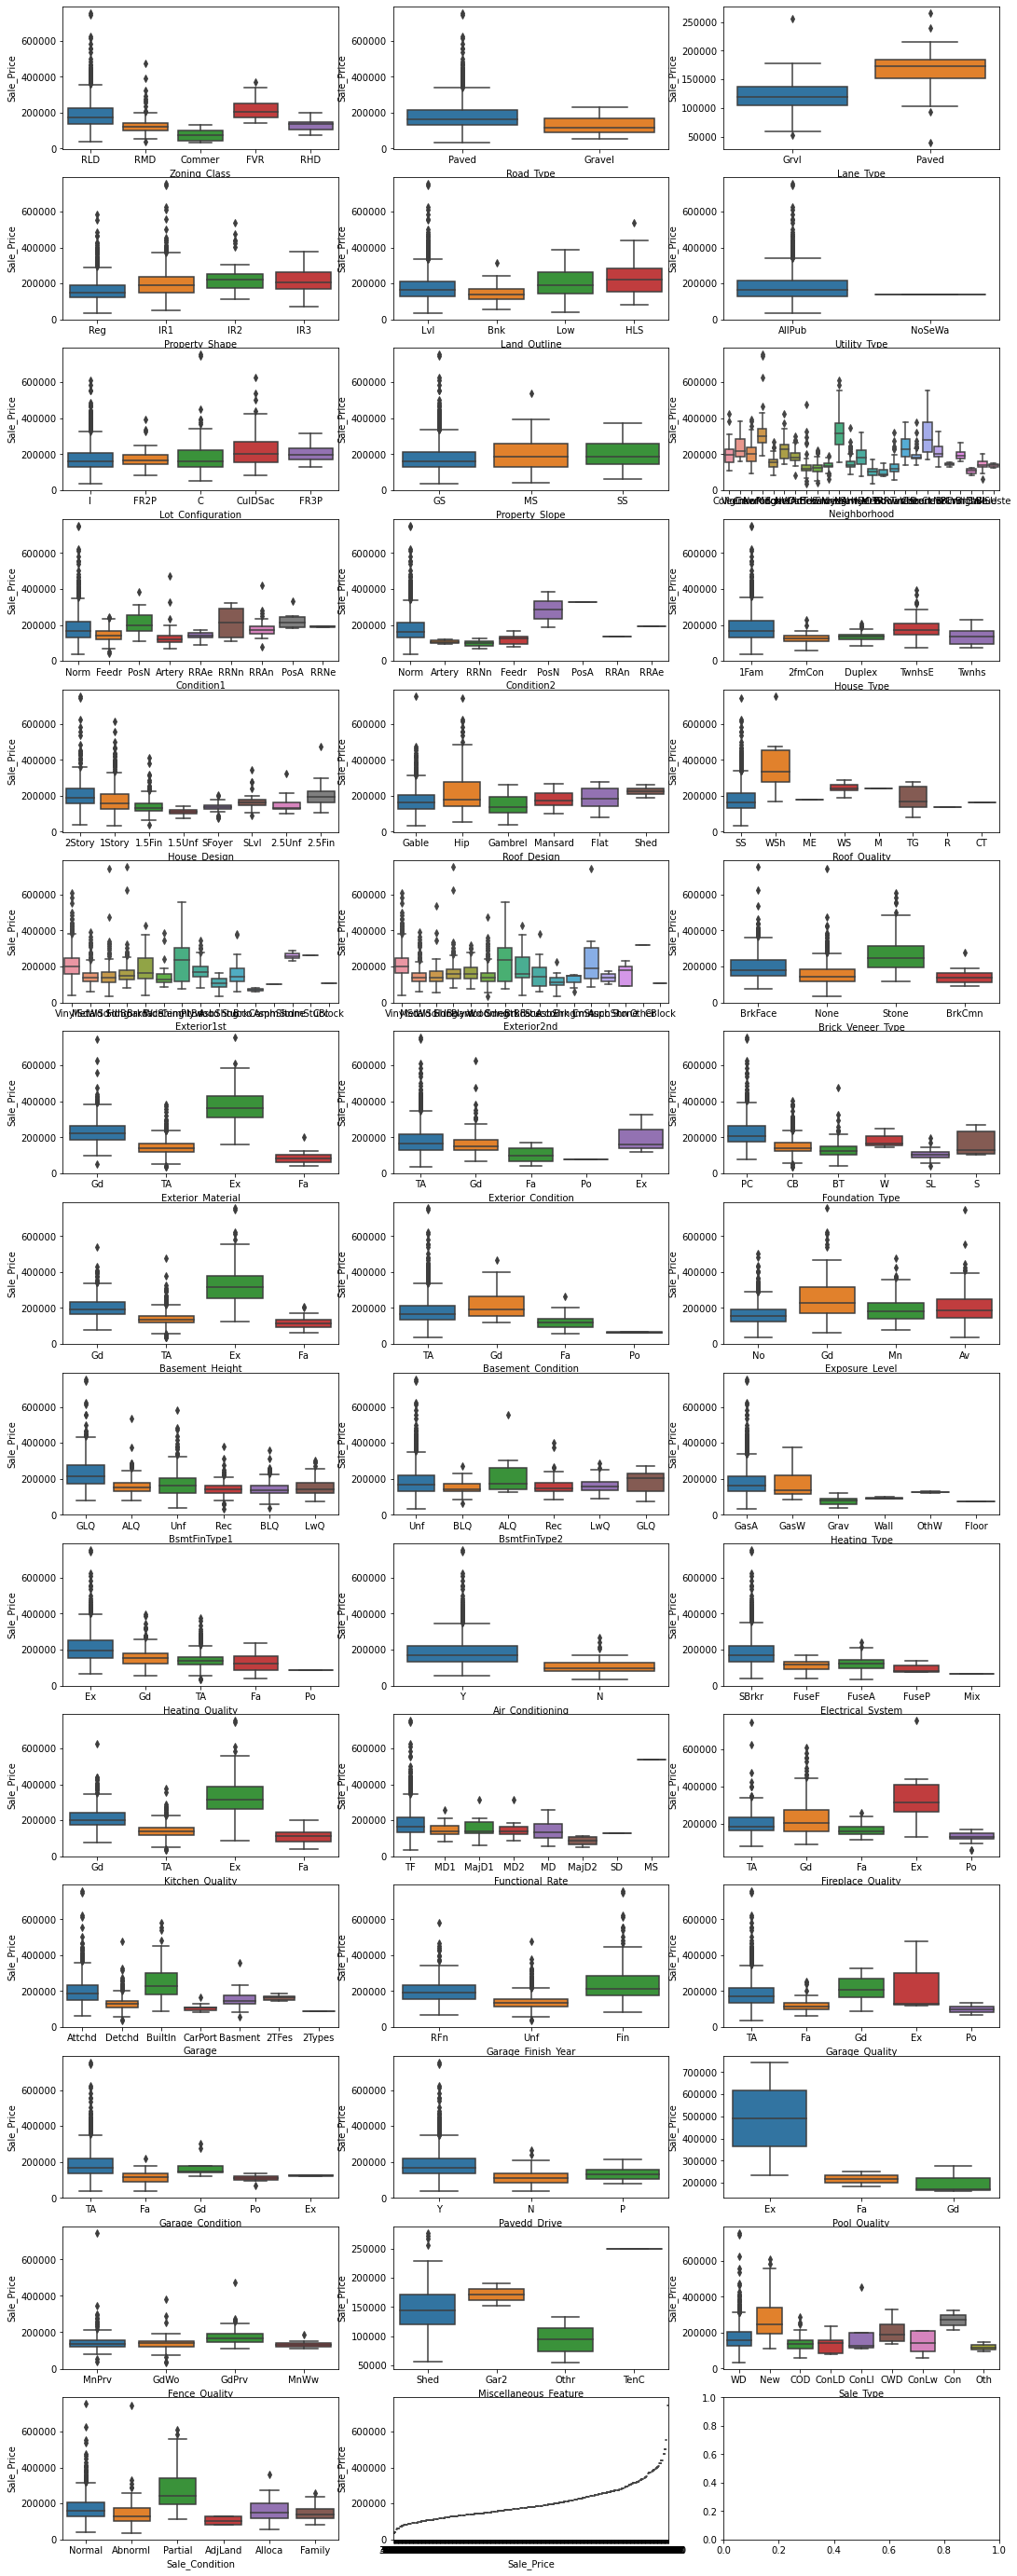

In [35]:
fig, axes = plt.subplots(15, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_train_categorical.columns:
    if j==3:
        i += 1
        j = 0
        sns.boxplot(x = col, y = "Sale_Price", data = df_train_categorical, ax = axes[i,j])
    else:
        sns.boxplot(x = col, y = "Sale_Price", data = df_train_categorical, ax = axes[i,j])
    j += 1

In [36]:
df_train.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Lane_Type',
       'Property_Shape', 'Land_Outline', 'Lot_Configuration', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area',
       'Heating_Quality', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grade',
       'Fireplaces', 'Fireplace_Quality', 'Garage', 'Garage_Built_Year',
       'Garage_Finish_Year', 'Garage_Size', 'Garag

In [37]:
df_test.columns

Index(['Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size', 'Lane_Type',
       'Property_Shape', 'Land_Outline', 'Lot_Configuration', 'Neighborhood',
       'Condition1', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area',
       'Heating_Quality', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Full_Bathroom_Above_Grade', 'Half_Bathroom_Above_Grade',
       'Bedroom_Above_Grade', 'Kitchen_Quality', 'Rooms_Above_Grade',
       'Fireplaces', 'Fireplace_Quality', 'Garage', 'Garage_Built_Year',
       'Garage_Finish_Year', 'Garage_Size', 'Garag

In [38]:
# Duplicate Values Treatment
print('No. of Duplicate Values in df_train_numeric dataframe:',df_train_numeric.duplicated().sum())
print('No. of Duplicate Values in df_test_numeric dataframe:',df_test_numeric.duplicated().sum())
print('No. of Duplicate Values in df_train_categorical dataframe:',df_train_categorical.duplicated().sum())
print('No. of Duplicate Values in df_test_categorical dataframe:',df_test_categorical.duplicated().sum())

No. of Duplicate Values in df_train_numeric dataframe: 0
No. of Duplicate Values in df_test_numeric dataframe: 0
No. of Duplicate Values in df_train_categorical dataframe: 1
No. of Duplicate Values in df_test_categorical dataframe: 13


In [39]:
# Dropping the Duplicate Values 
df_train.drop_duplicates(inplace = True)
df_test.drop_duplicates(inplace = True)

In [40]:
# Confirmed the Changes
print('No. of Duplicate Values in df_train dataframe: ',df_train.duplicated().sum())
print('No. of Duplicate Values in df_test dataframe: ',df_test.duplicated().sum())

No. of Duplicate Values in df_train dataframe:  0
No. of Duplicate Values in df_test dataframe:  0


<AxesSubplot:>

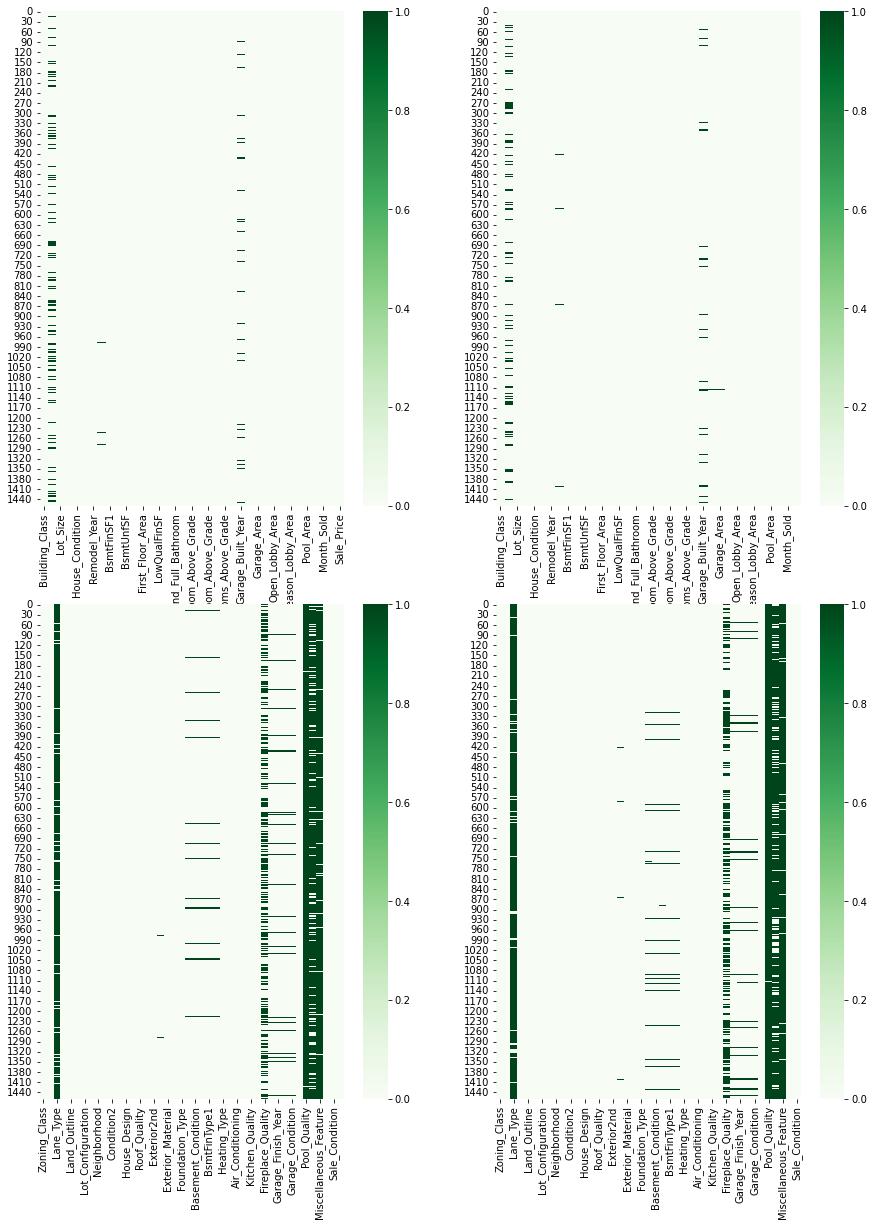

In [41]:
# Missing Values Treatment
fig, axes = plt.subplots(2, 2, figsize=(15,20))
sns.heatmap(df_train_numeric.isnull(), cmap = 'Greens', ax = axes[0,0])
sns.heatmap(df_test_numeric.isnull(), cmap = 'Greens', ax = axes[0,1])
sns.heatmap(df_train_categorical.isnull(), cmap = 'Greens', ax = axes[1,0])
sns.heatmap(df_test_categorical.isnull(), cmap = 'Greens', ax = axes[1,1])

In [42]:
# Drop the columns with Missing Values more than 30%
def drop_missing(df):
    i = 0
    for col in df:
        if (df[col].isnull().sum()/1460) > 0.3:
            df.drop(col, axis = 1, inplace = True)
            print('Column',col,'is Dropped')
            i += 1
    if i == 0:
        print('No Column is Dropped')

In [43]:
drop_missing(df_train)

Column Lane_Type is Dropped
Column Fireplace_Quality is Dropped
Column Pool_Quality is Dropped
Column Fence_Quality is Dropped


In [44]:
drop_missing(df_test)

Column Lane_Type is Dropped
Column Fireplace_Quality is Dropped
Column Pool_Quality is Dropped
Column Fence_Quality is Dropped


In [45]:
def fill_null(df):
    for col in df:
        if (col in numeric_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mean(), inplace = True)
            print('fillna numerical column: ',col)
        if (col in categorical_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mode().iloc[0], inplace = True)
            print('fillna categorical column: ',col)

In [46]:
fill_null(df_train)

fillna numerical column:  Lot_Extent
fillna categorical column:  Brick_Veneer_Type
fillna numerical column:  Brick_Veneer_Area
fillna categorical column:  Basement_Height
fillna categorical column:  Exposure_Level
fillna categorical column:  BsmtFinType1
fillna categorical column:  BsmtFinType2
fillna categorical column:  Garage
fillna numerical column:  Garage_Built_Year
fillna categorical column:  Garage_Finish_Year


In [47]:
fill_null(df_test)

fillna categorical column:  Zoning_Class
fillna numerical column:  Lot_Extent
fillna categorical column:  Exterior1st
fillna categorical column:  Exterior2nd
fillna categorical column:  Brick_Veneer_Type
fillna numerical column:  Brick_Veneer_Area
fillna categorical column:  Basement_Height
fillna categorical column:  Exposure_Level
fillna categorical column:  BsmtFinType1
fillna numerical column:  BsmtFinSF1
fillna categorical column:  BsmtFinType2
fillna numerical column:  BsmtFinSF2
fillna numerical column:  BsmtUnfSF
fillna numerical column:  Total_Basement_Area
fillna numerical column:  Underground_Full_Bathroom
fillna categorical column:  Kitchen_Quality
fillna categorical column:  Garage
fillna numerical column:  Garage_Built_Year
fillna categorical column:  Garage_Finish_Year
fillna numerical column:  Garage_Size
fillna numerical column:  Garage_Area
fillna categorical column:  Sale_Type


<AxesSubplot:>

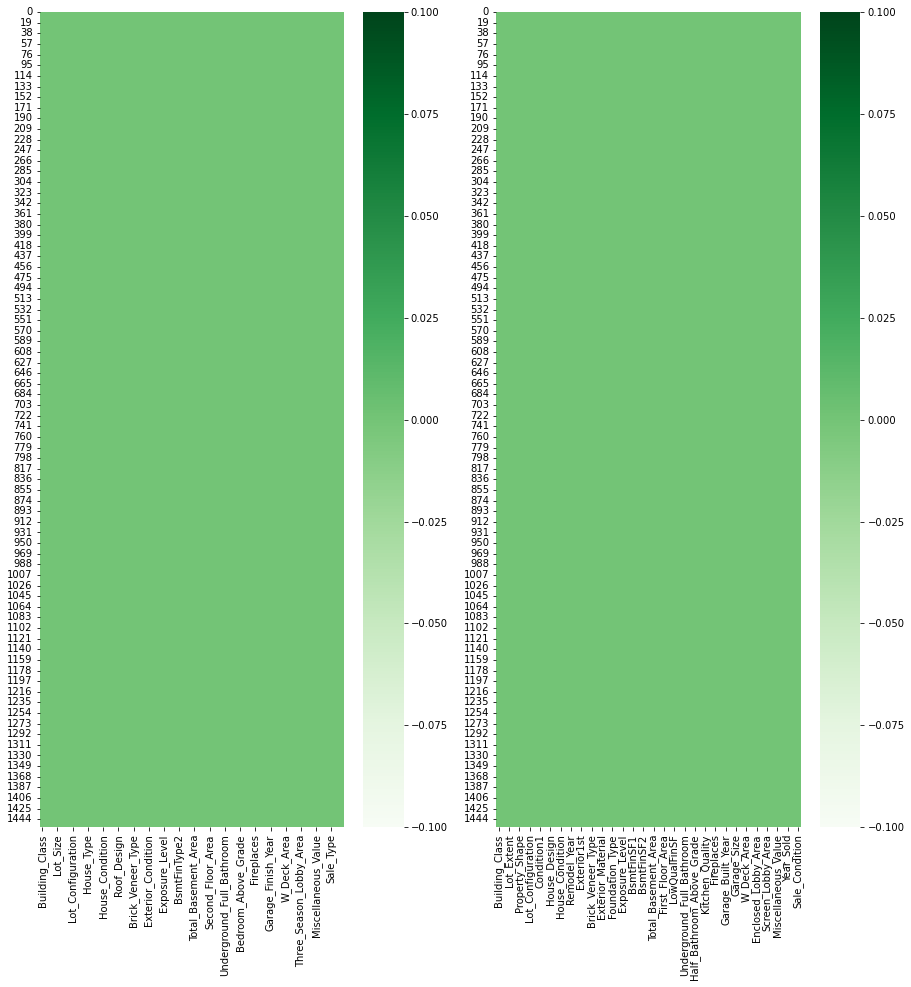

In [48]:
# Heatmap reflecting No Null Values
fig, axes = plt.subplots(1, 2, figsize=(15,15))
sns.heatmap(df_train.isnull(), cmap = 'Greens', ax = axes[0])
sns.heatmap(df_test.isnull(), cmap = 'Greens', ax = axes[1])

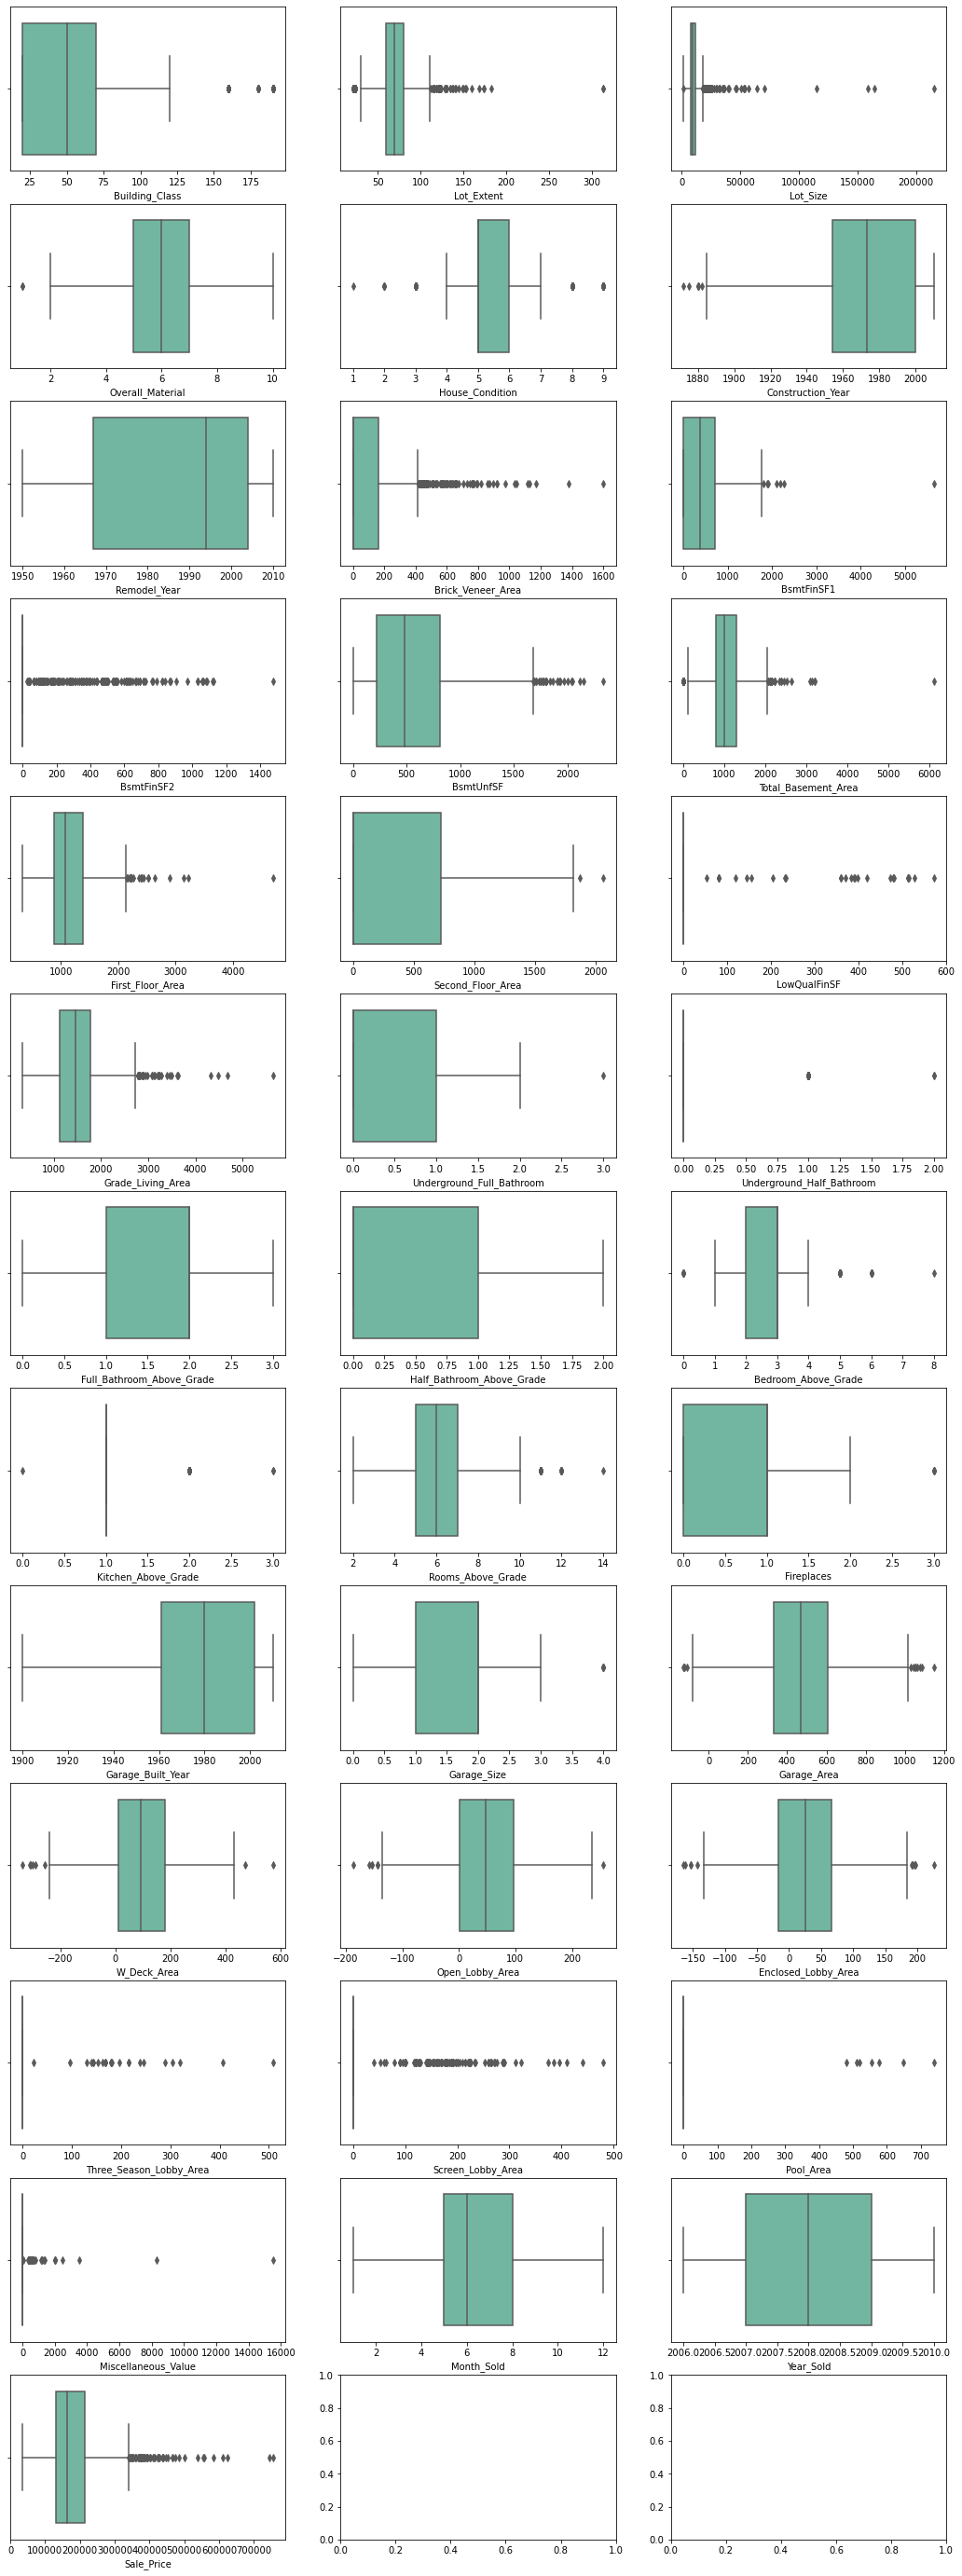

In [49]:
# Treating the Outliers
fig, axes = plt.subplots(13, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_train_numeric.columns:
    if j==3:
        i += 1
        j = 0
        sns.boxplot(x = df_train_numeric[col], data = df_train_numeric, palette = "Set2", ax = axes[i,j])
    else:
        sns.boxplot(x = df_train_numeric[col], data = df_train_numeric, palette = "Set2", ax = axes[i,j])
    j += 1

In [50]:
Q1 = np.percentile(df_train['Sale_Price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_train['Sale_Price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper Bound
upper = np.where(df_train['Sale_Price'] >= (Q3+1.5*IQR))

# Lower Bound
lower = np.where(df_train['Sale_Price'] <= (Q1-1.5*IQR))

# Drop Outlires
df_train.drop(upper[0], errors = 'ignore', inplace = True)
df_train.drop(lower[0], errors = 'ignore', inplace = True)

In [51]:
def remove_outlires(df, columns_list):
    for col in columns_list:
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        # Upper bound
        upper = np.where(df[col] >= (Q3+1.5*IQR))
        # lower bound
        lower = np.where(df[col] <= (Q1-1.5*IQR))
        # Drop Outlires
        df.drop(upper[0], errors = 'ignore', inplace = True)
        df.drop(lower[0], errors = 'ignore', inplace = True)

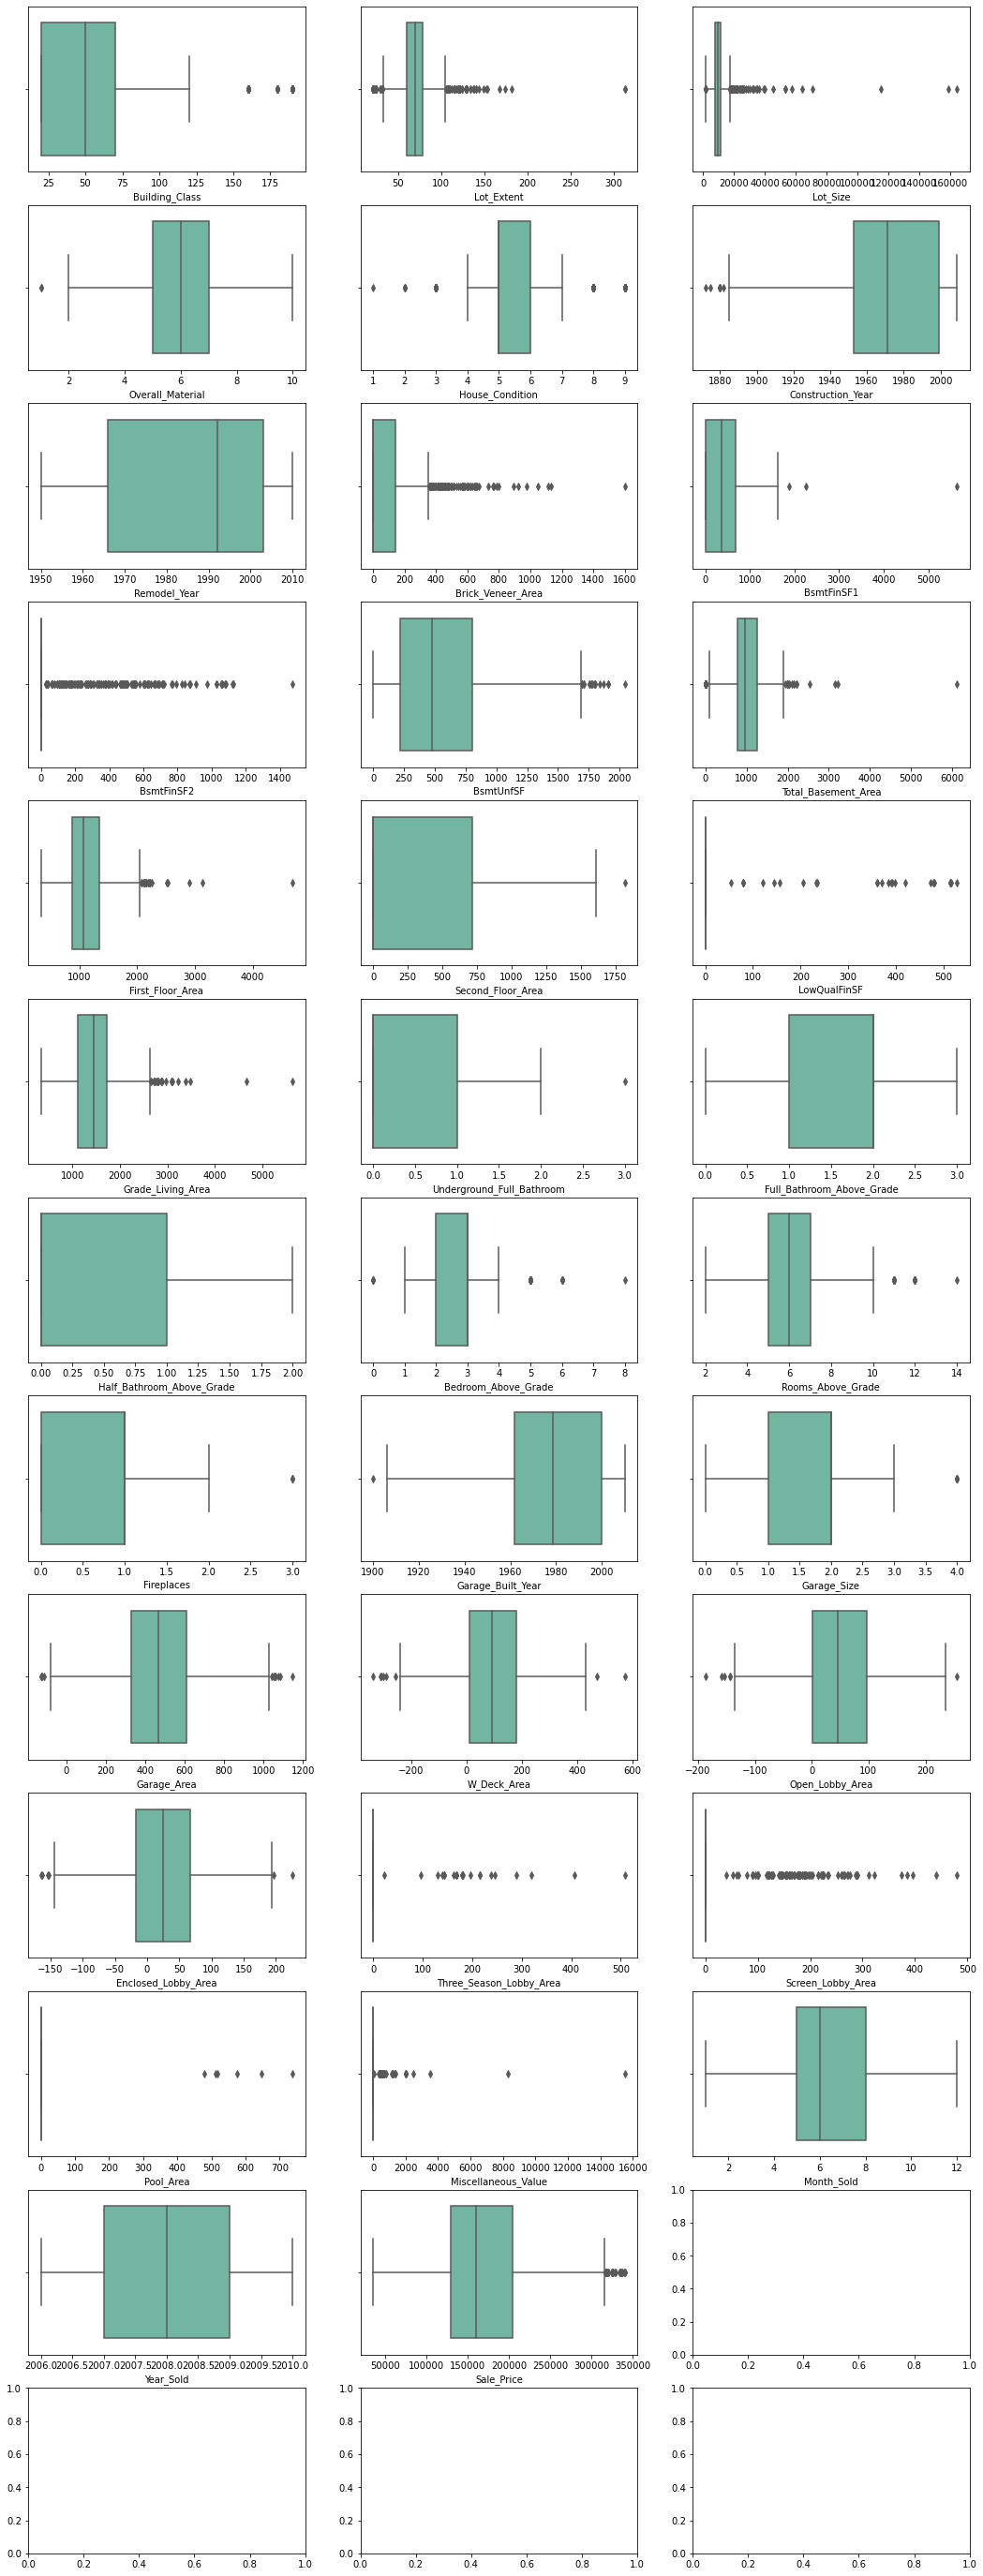

In [52]:
fig, axes = plt.subplots(13, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_train:
    if col in numeric_cols:
        if j==3:
            i += 1
            j = 0
            sns.boxplot(x = df_train[col], data = df_train, palette = "Set2", ax = axes[i,j])
        else:
            sns.boxplot(x = df_train[col], data = df_train, palette = "Set2", ax = axes[i,j])
        j += 1

In [53]:
numeric_cols_new = []
categorical_cols_new = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numeric_cols_new.append(df_train[col].name)
    else:
        categorical_cols_new.append(df_train[col].name)

In [54]:
train_dummies = pd.get_dummies(df_train[categorical_cols_new], drop_first = True)
test_dummies = pd.get_dummies(df_test[categorical_cols_new], drop_first = True)

In [55]:
df_train.drop(categorical_cols_new, axis = 1, inplace = True)
df_test.drop(categorical_cols_new, axis = 1, inplace = True)

In [56]:
df_train = df_train.join(train_dummies)
df_test = df_test.join(test_dummies)

In [57]:
for col in df_train:
    if (col not in df_test.columns) & (col != 'Sale_Price'):
        df_train.drop(col, axis = 1, inplace = True)
        
for col in df_test:
    if col not in df_train.columns:
        df_test.drop(col, axis = 1, inplace = True)

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1458
Columns: 180 entries, Building_Class to Sale_Condition_Partial
dtypes: float64(7), int64(28), uint8(145)
memory usage: 623.4 KB


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 179 entries, Building_Class to Sale_Condition_Partial
dtypes: float64(11), int64(23), uint8(145)
memory usage: 637.8 KB


In [60]:
# Split the Data into Train and Test 
from sklearn.model_selection import train_test_split
y = df_train['Sale_Price']
x = df_train.drop('Sale_Price', axis=1)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [62]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

In [63]:
x_test_scaled = sc.fit_transform(x_test)

In [64]:
x_train_scaled

array([[-0.8948823 , -0.16096054, -0.32756728, ..., -0.12792043,
         0.45391739, -0.27006788],
       [-0.8948823 ,  0.01925801,  0.13895424, ..., -0.12792043,
         0.45391739, -0.27006788],
       [-0.8948823 , -0.56185867, -0.33654416, ..., -0.12792043,
        -2.20304406, -0.27006788],
       ...,
       [ 0.04464432,  0.0172164 , -0.119718  , ..., -0.12792043,
         0.45391739, -0.27006788],
       [-0.8948823 ,  2.06625126,  0.46778424, ..., -0.12792043,
         0.45391739, -0.27006788],
       [-0.19023733,  0.01925801, -0.85126462, ..., -0.12792043,
         0.45391739, -0.27006788]])

In [65]:
x_test_scaled

array([[ 1.4877474 , -2.06854096, -0.49801378, ..., -0.08481889,
         0.39626354, -0.26211122],
       [-0.8074001 ,  0.13176137, -0.09850506, ..., -0.08481889,
         0.39626354, -0.26211122],
       [-0.11885585,  0.7107883 ,  0.58160081, ..., -0.08481889,
         0.39626354, -0.26211122],
       ...,
       [ 0.5696884 ,  1.92674485, -0.10021601, ..., -0.08481889,
         0.39626354, -0.26211122],
       [-0.57788535, -1.02629249, -0.08396191, ..., -0.08481889,
         0.39626354, -0.26211122],
       [ 0.79920315, -0.73677903,  0.19834619, ..., -0.08481889,
         0.39626354, -0.26211122]])

In [66]:
# Model Prediction
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(x_test)
y_pred

array([158701.23406033, 139668.18560835, 141706.63689895, 186464.88202367,
       312345.94704501, 162431.8117198 ,  60232.6063506 , 282190.60522909,
       136909.5848458 , 209886.39634631,  75926.77938703, 225414.27203026,
       209683.79348287, 110675.90224992, 144958.66117928, 159979.11186002,
       213622.85311925,  76425.83550242, 134815.64829755, 265773.11529357,
       155666.86420719, 185151.09126233,  53881.89392956, 127597.1662531 ,
       293283.90139552, 160902.05991389, 133732.74473343, 160147.06144348,
       110857.83902394, 270018.15584575, 286414.42149411, 165332.88854613,
       168863.81114393, 203613.49834389, 117573.40931392, 147598.58760343,
       131687.42917399, 188792.65074081, 208128.91811291, 162632.00307773,
       129128.80883   , 113154.18196955, 223479.98585695, 136961.42267493,
       222011.29565557, 106347.62727556, 158124.76434335, 128595.47779465,
       213988.18475888,  95553.67415555, 305104.45474941, 192771.38652436,
       254856.67836093, 1

In [68]:
y_test.values

array([153500, 140000, 134432, 168500, 302000, 173000,  73000, 319000,
       139000, 186700,  40000, 250580, 230500, 118000, 140000, 170000,
       227000,  95000, 129000, 143000, 174000, 177000,  61000, 143900,
       290000, 172500, 144000, 144000, 110500, 301500, 333168, 129500,
       170000, 207500, 110000, 145000, 131500, 186500, 197000, 152000,
       124500, 144000, 244000, 127000, 245350, 110000, 169000, 133000,
       189000, 100000, 310000, 182900, 287090, 105500,  90000,  87000,
       210000, 287000, 140000, 250000, 265900, 169500, 179000,  91300,
       151000, 183000, 135000,  84000, 233170, 214900, 229456, 228000,
       141000, 151000, 116000, 226700, 100000, 215000, 110000,  84500,
       171000, 148000, 163990, 144000, 197000,  80000, 149900, 152000,
       215000, 184000, 236500, 157000, 175000, 165500, 112000, 132000,
       287000, 100000, 167900,  58500, 121600, 110000, 110000, 167500,
       108000, 140000, 160000, 127000, 207000, 180000, 277000, 130000,
      

In [69]:
# Accuracy Score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
mean_absolute_error(y_test, y_pred)

15792.594801641548

In [71]:
np.sqrt(mean_squared_error(y_test, y_pred))

21438.186079271647

In [72]:
r2_score(y_test, y_pred)

0.8699773132289405

In [73]:
subm_preds = lr.predict(df_test)
subm_preds

array([110832.06796473, 147488.82060695, 171034.69114633, ...,
       145347.25459007, 100168.2912106 , 196526.96243974])

In [74]:
submission = pd.DataFrame({
        "Id": id_test_list,
        "Sale_Price": subm_preds})

In [75]:
submission.to_csv('Result.csv', index = False)